Plotting chart with markers...


ValueError: x and y must be the same size

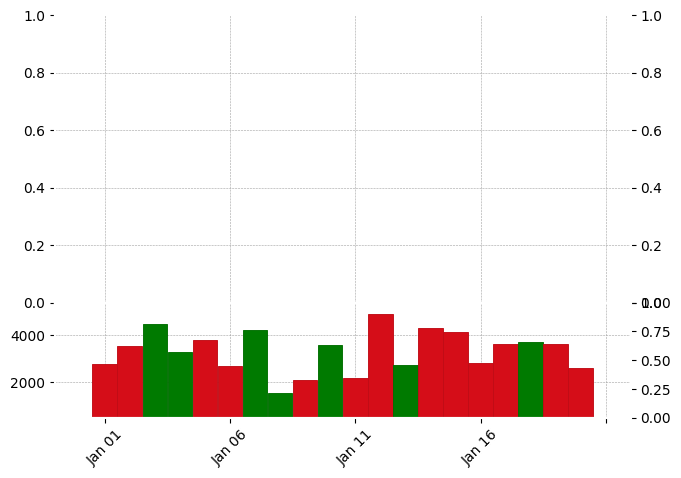

In [7]:
import mplfinance as mpf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Create sample OHLC data
dates = pd.date_range(start='2025-01-01', periods=20, freq='D')
np.random.seed(42)
close_prices = 100 + np.cumsum(np.random.randn(20) * 2)
data = pd.DataFrame({
    'Open': close_prices + np.random.randn(20) * 0.5,
    'High': close_prices + np.abs(np.random.randn(20) * 1.5),
    'Low': close_prices - np.abs(np.random.randn(20) * 1.5),
    'Close': close_prices,
    'Volume': np.random.randint(1000, 5000, 20)
}, index=dates)

# Method 1: Using scatter plot with text annotations
# Create signals where we want to add text
buy_signals = data['Close'] > data['Close'].rolling(3).mean()
sell_signals = data['Close'] < data['Close'].rolling(3).mean()

# Prepare data for markers - use where() to keep NaN for non-signals
buy_points = pd.Series(np.where(buy_signals, data['Low'] * 0.98, np.nan), 
                       index=data.index)
sell_points = pd.Series(np.where(sell_signals, data['High'] * 1.02, np.nan), 
                        index=data.index)

# Create addplot for markers
apds = [
    mpf.make_addplot(buy_points, type='scatter', markersize=100, 
                     marker='^', color='green'),
    mpf.make_addplot(sell_points, type='scatter', markersize=100, 
                     marker='v', color='red')
]

# Method 2: Using custom panel with text
# To add actual text, we need to use a custom panel
def add_text_markers(data, ax):
    """Add text annotations to the chart."""
    for i, (idx, row) in enumerate(data.iterrows()):
        if buy_signals.iloc[i]:
            ax[0].text(i, row['Low'] * 0.97, f'${row["Close"]:.1f}', 
                      ha='center', va='top', fontsize=8, 
                      color='green', weight='bold')
        if sell_signals.iloc[i]:
            ax[0].text(i, row['High'] * 1.03, f'${row["Close"]:.1f}', 
                      ha='center', va='bottom', fontsize=8, 
                      color='red', weight='bold')

# Basic plot with markers only
print("Plotting chart with markers...")
mpf.plot(data, type='candle', style='charles', volume=True, 
         addplot=apds, title='Price with Buy/Sell Signals')

# Plot with text annotations
fig, axes = mpf.plot(data, type='candle', style='charles', volume=True,
                     addplot=apds, title='Price with Dynamic Text Markers',
                     returnfig=True)
add_text_markers(data, axes)
fig.show()

# Method 3: Advanced - Text with custom values
# Add percentage change as text
def add_pct_change_text(data, ax):
    """Add percentage change text at key points."""
    pct_change = data['Close'].pct_change() * 100
    
    for i, (idx, row) in enumerate(data.iterrows()):
        if i > 0 and abs(pct_change.iloc[i]) > 2:  # Significant moves
            color = 'green' if pct_change.iloc[i] > 0 else 'red'
            y_pos = row['High'] * 1.03 if pct_change.iloc[i] > 0 else row['Low'] * 0.97
            va = 'bottom' if pct_change.iloc[i] > 0 else 'top'
            
            ax[0].text(i, y_pos, f'{pct_change.iloc[i]:+.1f}%', 
                      ha='center', va=va, fontsize=7, 
                      color=color, weight='bold',
                      bbox=dict(boxstyle='round,pad=0.3', 
                               facecolor='white', alpha=0.7))

fig2, axes2 = mpf.plot(data, type='candle', style='charles', volume=True,
                       title='Price with % Change Labels',
                       returnfig=True)
add_pct_change_text(data, axes2)
fig2.show()

print("\nTips:")
print("- Use returnfig=True to get figure and axes for text annotations")
print("- Text position uses index (0, 1, 2...) for x-axis")
print("- Adjust y-position relative to High/Low for visibility")
print("- Use bbox parameter for better text readability")